<a href="https://colab.research.google.com/github/Antonyraj007/Antony-/blob/main/customer_convention_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np



In [2]:
df=pd.read_csv("train.csv")
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
df.describe()


,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [5]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [6]:
df.shape

(45211, 11)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [10]:
df.dtypes


age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [11]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

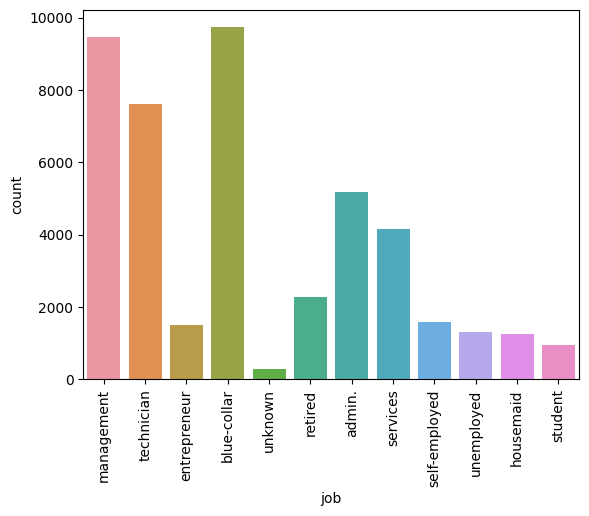

In [12]:
#we consider unknown as a missing value 
sns.countplot(x=df['job'])
plt.xticks(rotation=90)
plt.show()

In [13]:
index=df[(df['job']=='unknown')].index
df.drop(index,inplace=True)
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [15]:
df['marital'].value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

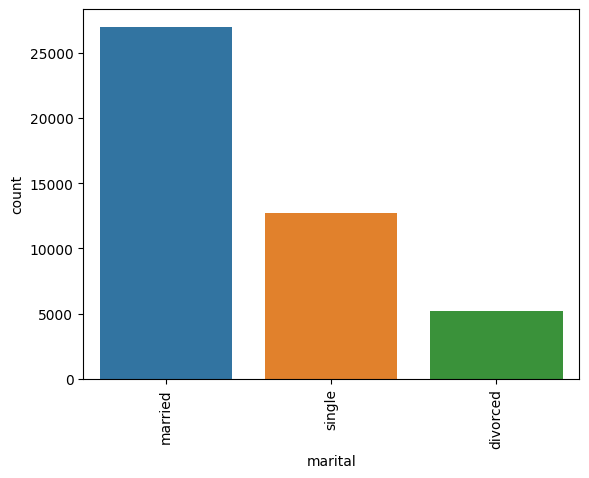

In [16]:
sns.countplot(x=df['marital'])
plt.xticks(rotation=90)
plt.show()

In [17]:
df['education_qual'].value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education_qual, dtype: int64

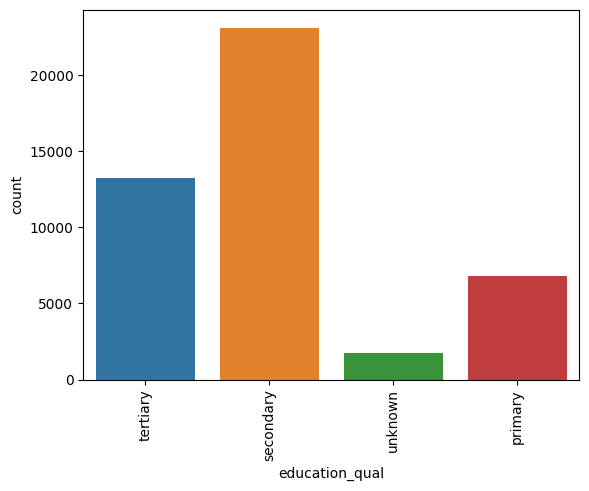

In [18]:
sns.countplot(x=df['education_qual'])
plt.xticks(rotation=90)
plt.show()

In [19]:
pd.DataFrame(df[['job','education_qual']]).value_counts()

job            education_qual
management     tertiary          7801
blue-collar    secondary         5371
technician     secondary         5229
admin.         secondary         4219
blue-collar    primary           3758
services       secondary         3457
technician     tertiary          1968
management     secondary         1121
retired        secondary          984
self-employed  tertiary           833
retired        primary            795
unemployed     secondary          728
entrepreneur   tertiary           686
housemaid      primary            627
self-employed  secondary          577
admin.         tertiary           572
entrepreneur   secondary          542
student        secondary          508
blue-collar    unknown            454
housemaid      secondary          395
retired        tertiary           366
services       primary            345
management     primary            294
unemployed     tertiary           289
               primary            257
management     unkno

In [20]:
df.loc[(df['job']=="management") & (df['education_qual']=="unknown"),'education_qual']="tertiary"

df.loc[(df['job']=='blue-collar') & (df['education_qual']=='unknown'),'education_qual']='secondary'
df.loc[(df['job']=='technician') & (df['education_qual']=='unknown'),'education_qual']='secondary'
df.loc[(df['job']=='admin.') & (df['education_qual']=='unknown'),'education_qual']='secondary'
df.loc[(df['job']=='student') & (df['education_qual']=='unknown'),'education_qual']='secondary'
df.loc[(df['job']=='services') & (df['education_qual']=='unknown'),'education_qual']='secondary'
df.loc[(df['job']=='retired') & (df['education_qual']=='unknown'),'education_qual']='secondary'

In [21]:
pd.DataFrame(df[['job','education_qual']]).value_counts()

job            education_qual
management     tertiary          8043
blue-collar    secondary         5825
technician     secondary         5471
admin.         secondary         4390
blue-collar    primary           3758
services       secondary         3607
technician     tertiary          1968
management     secondary         1121
retired        secondary         1103
self-employed  tertiary           833
retired        primary            795
unemployed     secondary          728
entrepreneur   tertiary           686
student        secondary          671
housemaid      primary            627
self-employed  secondary          577
admin.         tertiary           572
entrepreneur   secondary          542
housemaid      secondary          395
retired        tertiary           366
services       primary            345
management     primary            294
unemployed     tertiary           289
               primary            257
student        tertiary           223
admin.         prima

In [22]:
index=df[(df['job']=='unemployed')&(df['education_qual']=='unknown')].index
df.drop(index,inplace=True)

index=df[(df['job']=='housemaid')&(df['education_qual']=='unknown')].index
df.drop(index,inplace=True)

index=df[(df['job']=='self-employed')&(df['education_qual']=='unknown')].index
df.drop(index,inplace=True)

index=df[(df['job']=='entrepreneur')&(df['education_qual']=='unknown')].index
df.drop(index,inplace=True)

In [23]:
pd.DataFrame(df[['job','education_qual']]).value_counts()

job            education_qual
management     tertiary          8043
blue-collar    secondary         5825
technician     secondary         5471
admin.         secondary         4390
blue-collar    primary           3758
services       secondary         3607
technician     tertiary          1968
management     secondary         1121
retired        secondary         1103
self-employed  tertiary           833
retired        primary            795
unemployed     secondary          728
entrepreneur   tertiary           686
student        secondary          671
housemaid      primary            627
self-employed  secondary          577
admin.         tertiary           572
entrepreneur   secondary          542
housemaid      secondary          395
retired        tertiary           366
services       primary            345
management     primary            294
unemployed     tertiary           289
               primary            257
student        tertiary           223
admin.         prima

In [24]:
df['call_type'].value_counts()#in this case weconsider as a one category not a missing value

cellular     29052
unknown      12846
telephone     2836
Name: call_type, dtype: int64

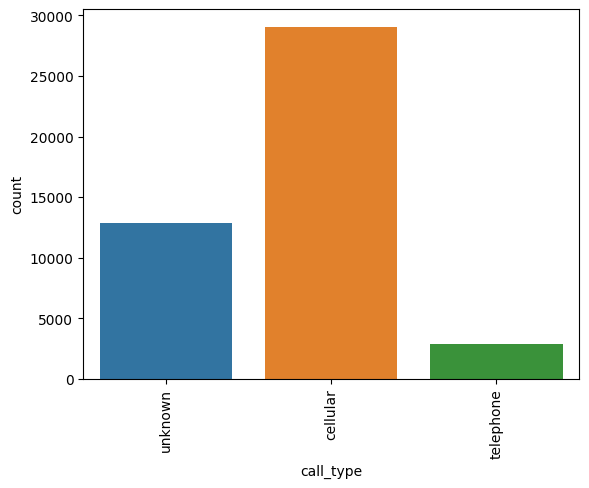

In [25]:
sns.countplot(x=df['call_type'])
plt.xticks(rotation=90)
plt.show()

In [26]:
df['mon'].value_counts()

may    13691
jul     6830
aug     6162
jun     5210
nov     3943
apr     2919
feb     2619
jan     1381
oct      726
sep      566
mar      474
dec      213
Name: mon, dtype: int64

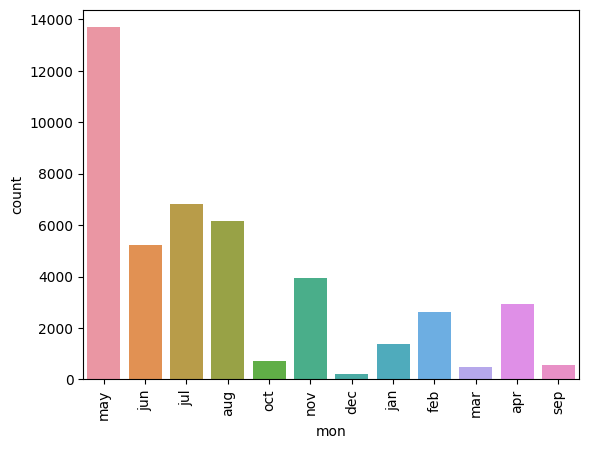

In [27]:
sns.countplot(x=df['mon'])
plt.xticks(rotation=90)
plt.show()

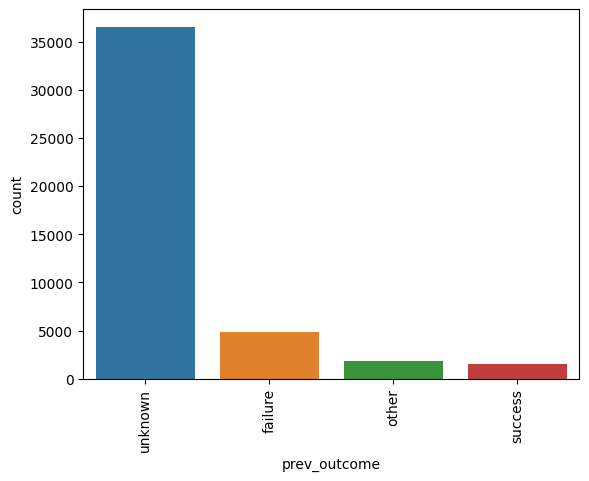

In [28]:
df['prev_outcome'].value_counts()
sns.countplot(x=df['prev_outcome'])
plt.xticks(rotation=90)
plt.show()


(array([0]), [Text(0, 0, '0')])

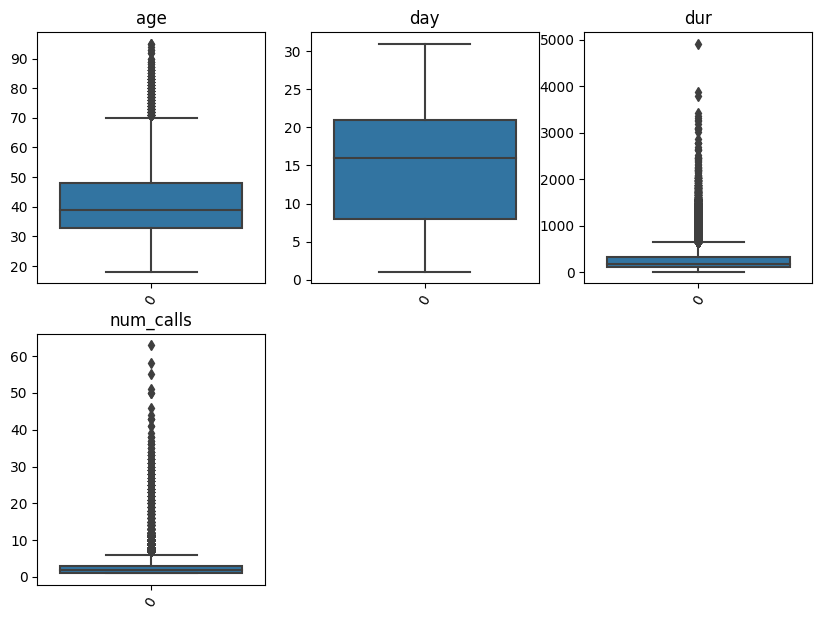

In [29]:
#find outliers 

plt.figure(figsize=(10,15))

plt.subplot(431)
sns.boxplot(df['age'])
plt.title('age')
plt.xticks(rotation=60)

plt.subplot(432)
sns.boxplot(df['day'])
plt.title('day')
plt.xticks(rotation=60)

plt.subplot(433)
sns.boxplot(df['dur'])
plt.title('dur')
plt.xticks(rotation=60)

plt.subplot(434)
sns.boxplot(df['num_calls'])
plt.title('num_calls')
plt.xticks(rotation=60)


In [30]:
df.shape

(44734, 11)

In [31]:
#droping duplicate
df=df.drop_duplicates()
df.shape

(44728, 11)

Text(0.5, 1.0, 'convention according to education_qual')

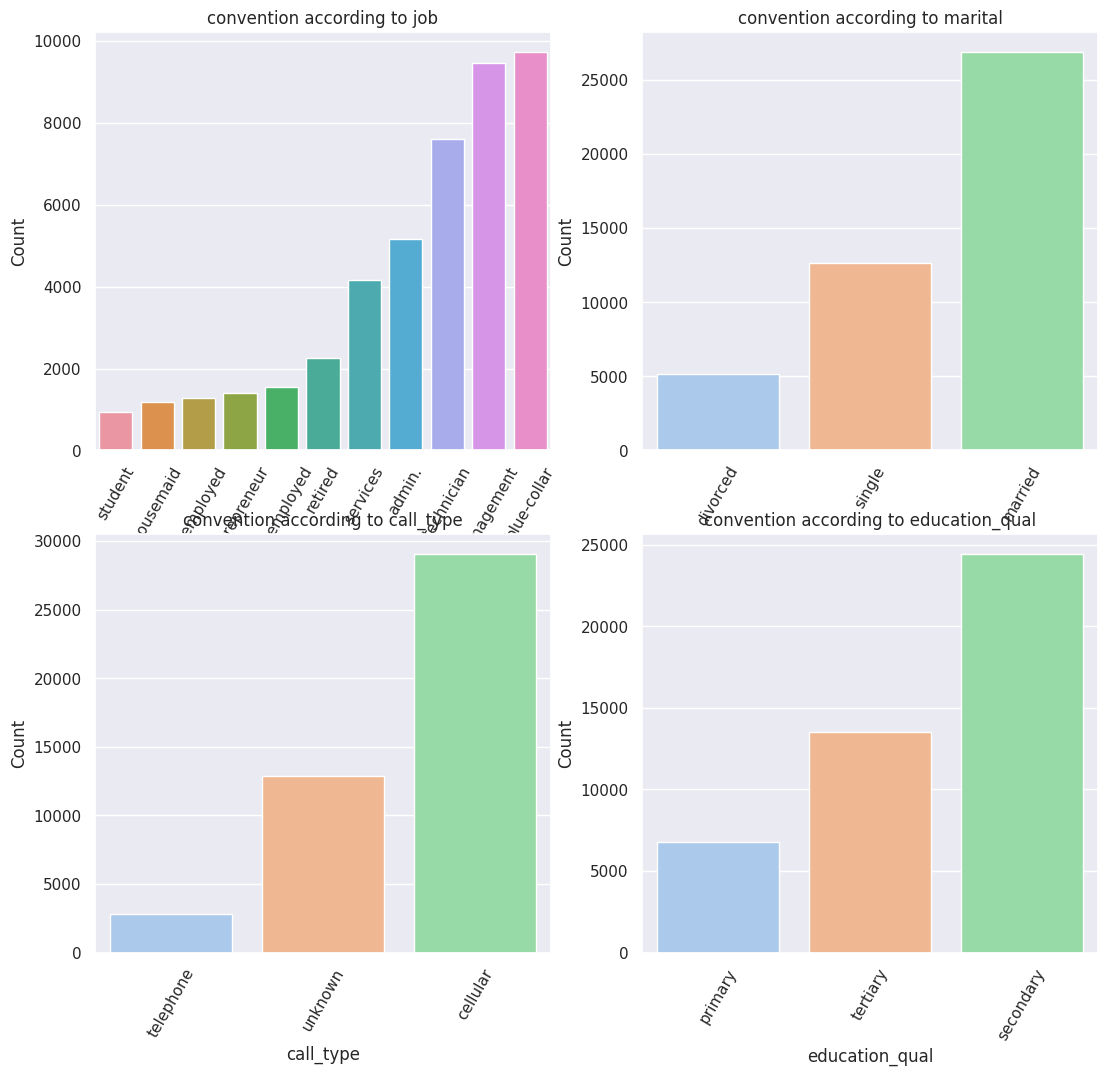

In [32]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(x=df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=60)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('convention according to job')

plt.subplot(432)
sns.countplot(x=df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=60)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('convention according to marital')




plt.subplot(434)
sns.countplot(x=df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=60)
plt.xlabel('call_type')
plt.ylabel('Count')
plt.title('convention according to call_type')



plt.subplot(435)
sns.countplot(x=df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=60)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('convention according to education_qual')


Text(0.5, 1.0, 'convention according to mon')

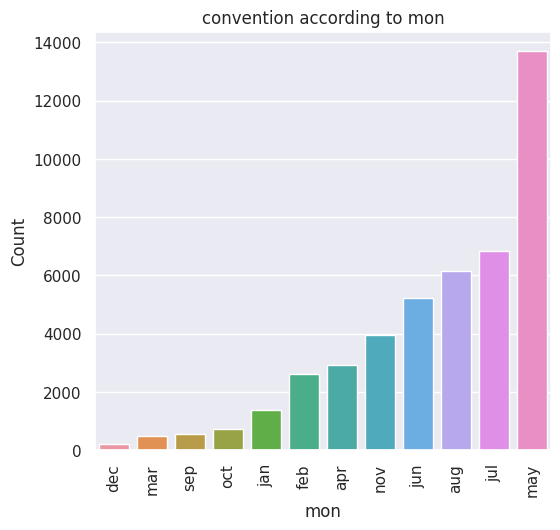

In [33]:
plt.figure(figsize=(20,25))
plt.subplot(435)
sns.countplot(x=df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel('mon')
plt.ylabel('Count')
plt.title('convention according to mon')



In [34]:
#interpretations:
#from above data visualization job,education_qual,mon,call_type having linear relationship with target variable so we can go with label encoding(ordinal)
#martial dont have linear relationship b/w gargetvariable(y) so we can go with OHE




Text(0.5, 1.0, 'mon vs y')

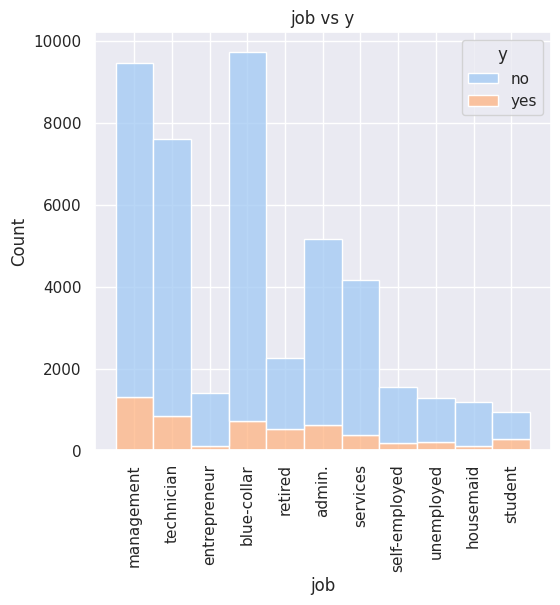

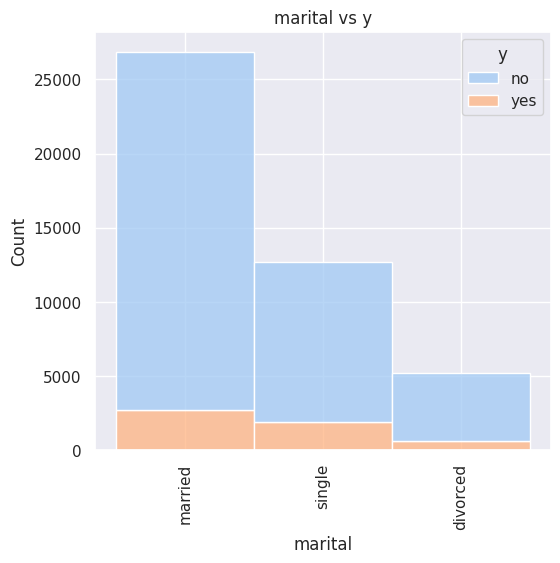

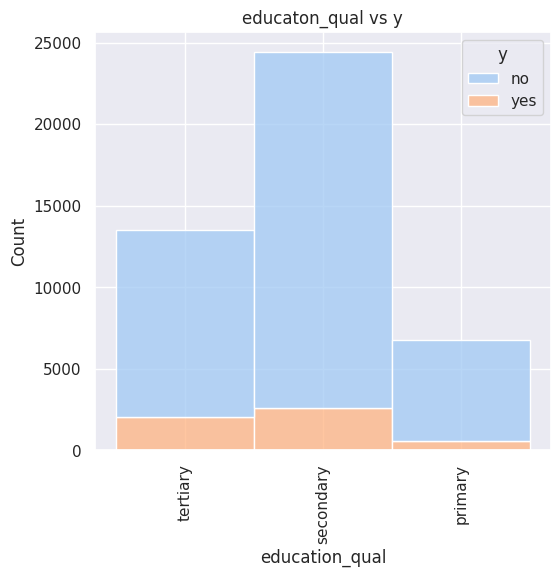

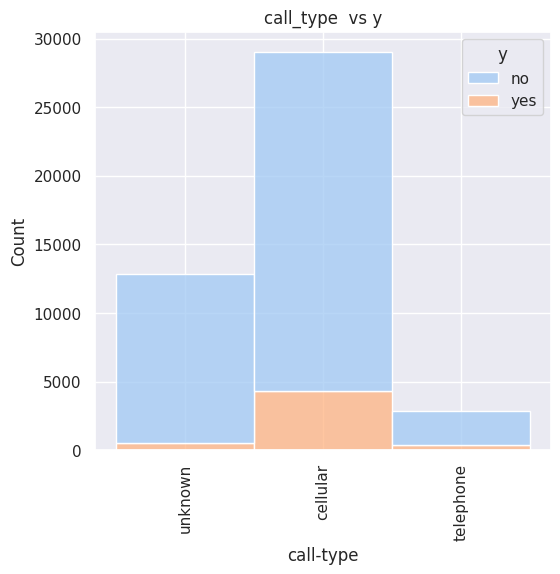

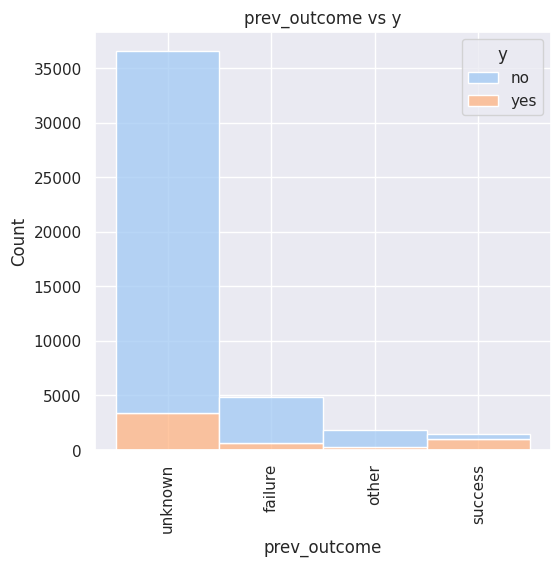

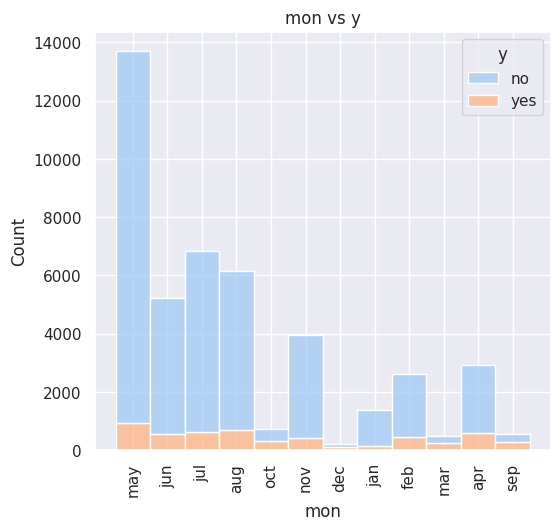

In [35]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.histplot(binwidth=0.5,x=df['job'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('job vs y')

plt.figure(figsize=(20,25))
plt.subplot(432)
sns.histplot(binwidth=0.5,x=df['marital'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('marital vs y')

plt.figure(figsize=(20,25))
plt.subplot(433)
sns.histplot(binwidth=0.5,x=df['education_qual'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('educaton_qual vs y')

plt.figure(figsize=(20,25))
plt.subplot(434)
sns.histplot(binwidth=0.5,x=df['call_type'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('call-type')
plt.ylabel('Count')
plt.title('call_type  vs y')

plt.figure(figsize=(20,25))
plt.subplot(435)
sns.histplot(binwidth=0.5,x=df['prev_outcome'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('prev_outcome')
plt.ylabel('Count')
plt.title('prev_outcome vs y')

plt.figure(figsize=(20,25))
plt.subplot(436)
sns.histplot(binwidth=0.5,x=df['mon'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('mon')
plt.ylabel('Count')
plt.title('mon vs y')



based on above figure our coonclusion about encoding
job (ordinal encoding order baded on above fig
1.Housemaid,2.entrepreneur,3.self-employed,4.unemployed,5.student,6.serivices,7.retired,8.admin.,9.bluecollar,10.technician,11.Management

education_qual(ordeinal encoding)
1.primary
2.teritary
3.secondary

call_type(ordinal encoding)
1.telephone
2.unknown
3.cellular

mon(ordinal encoding)
1.dec,2.jan,3.Mar,4.sep,5.oct,6.nov7.feb,8.jun,9.april,10.july,11.aug,12.may

prev-outcome(OHE),marital(OHE)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

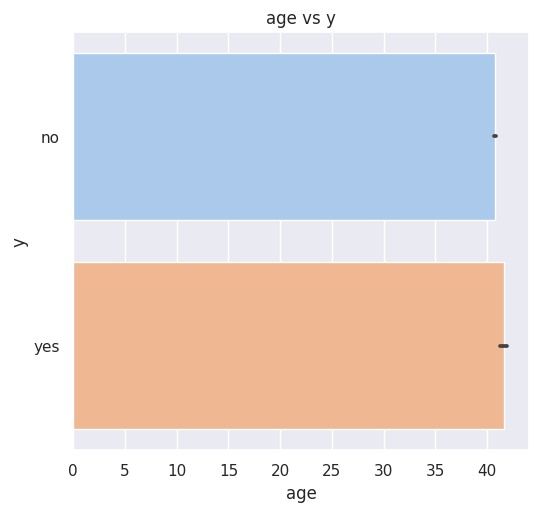

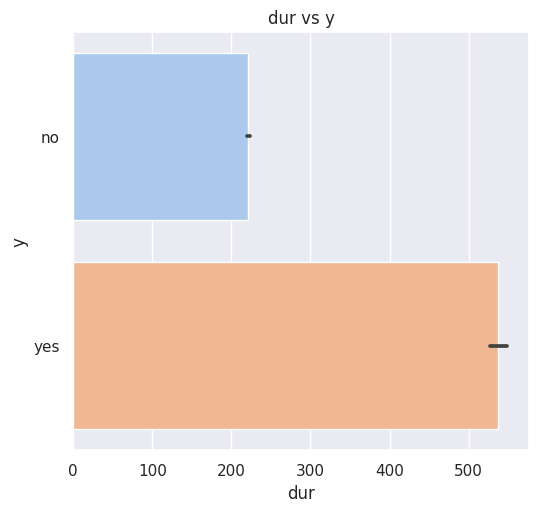

In [36]:
#ploting continous feature vs y
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.barplot(x=df['age'],y=df['y'])
plt.title('age vs y')
plt.xticks()

plt.figure(figsize=(20,25))
plt.subplot(432)
sns.barplot(x=df['dur'],y=df['y'])
plt.title('dur vs y')
plt.xticks()



above figure based on age increase insurance rate also increase and dur of call increase insurance rate increase


Text(0.5, 1.0, 'num_calls vs y')

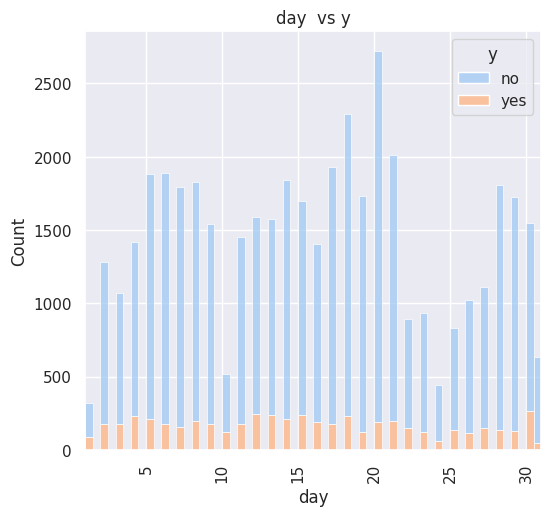

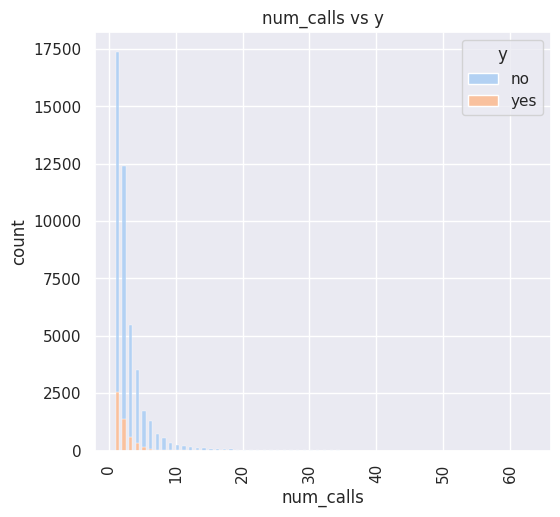

In [37]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.histplot(binwidth=0.5,x=df['day'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('day')
plt.ylabel('Count')
plt.title('day  vs y')
plt.xlim(1,31)

plt.figure(figsize=(20,25))
plt.subplot(432)
sns.histplot(binwidth=0.5,x=df['num_calls'],hue=df["y"],data=df,stat='count',multiple='stack')
plt.xticks(rotation=90)
plt.xlabel('num_calls')
plt.ylabel('count')
plt.title('num_calls vs y')

based on fig conversion rate was increased on weekend 
no of calls decrase the conversion rate so no of calls inversely propertional to conversion rate  

In [38]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no


In [39]:
#encoding

df['job']=df['job'].map({'housemaid':0,'entrepreneur':1,'self-employed':2,'unemployed':3,'student':4,'services':5,'retired':6,'admin.':7,'blue-collar':8,'technician':9,'management':10})


In [40]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,10,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,9,single,secondary,unknown,5,may,151,1,unknown,no
2,33,1,married,secondary,unknown,5,may,76,1,unknown,no
3,47,8,married,secondary,unknown,5,may,92,1,unknown,no
5,35,10,married,tertiary,unknown,5,may,139,1,unknown,no


In [41]:
df['job']

0        10
1         9
2         1
3         8
5        10
         ..
45206     9
45207     6
45208     6
45209     8
45210     1
Name: job, Length: 44728, dtype: int64

In [42]:
df['education_qual'].value_counts()

secondary    24427
tertiary     13502
primary       6799
Name: education_qual, dtype: int64

In [43]:
df['education_qual']=df['education_qual'].map({'primary':0,'tertiary':1,'secondary':2})


In [44]:
df['education_qual'].value_counts()

2    24427
1    13502
0     6799
Name: education_qual, dtype: int64

In [45]:
df['call_type'].value_counts()

cellular     29049
unknown      12843
telephone     2836
Name: call_type, dtype: int64

In [46]:
df['call_type']=df['call_type'].map({'telephone':0,'unknown':1,'cellular':2})

In [47]:
df['call_type'].value_counts()

2    29049
1    12843
0     2836
Name: call_type, dtype: int64

In [48]:
df['mon'].value_counts()

may    13690
jul     6829
aug     6160
jun     5208
nov     3943
apr     2919
feb     2619
jan     1381
oct      726
sep      566
mar      474
dec      213
Name: mon, dtype: int64

In [49]:
df['mon']=df['mon'].map({'dec':0,'jan':1,'mar':2,'sep':3,'oct':4,'nov':5,'feb':6,'jun':7,'apr':8,'jul':9,'aug':10,'may':11})

In [50]:
df['mon'].value_counts()

11    13690
9      6829
10     6160
7      5208
5      3943
8      2919
6      2619
1      1381
4       726
3       566
2       474
0       213
Name: mon, dtype: int64

In [51]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,10,married,1,1,5,11,261,1,unknown,no
1,44,9,single,2,1,5,11,151,1,unknown,no
2,33,1,married,2,1,5,11,76,1,unknown,no
3,47,8,married,2,1,5,11,92,1,unknown,no
5,35,10,married,1,1,5,11,139,1,unknown,no


In [52]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,10,married,1,1,5,11,261,1,unknown,no
1,44,9,single,2,1,5,11,151,1,unknown,no
2,33,1,married,2,1,5,11,76,1,unknown,no
3,47,8,married,2,1,5,11,92,1,unknown,no
5,35,10,married,1,1,5,11,139,1,unknown,no


In [53]:
ohe1=pd.get_dummies(df[["marital"]])
df=df.drop('marital',axis=1)
df=pd.concat([df,ohe1],axis=1)


ohe2=pd.get_dummies(df[["prev_outcome"]])
df=df.drop('prev_outcome',axis=1)
df=pd.concat([df,ohe2],axis=1)

In [54]:
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,10,1,1,5,11,261,1,no,0,1,0,0,0,0,1
1,44,9,2,1,5,11,151,1,no,0,0,1,0,0,0,1
2,33,1,2,1,5,11,76,1,no,0,1,0,0,0,0,1
3,47,8,2,1,5,11,92,1,no,0,1,0,0,0,0,1
5,35,10,1,1,5,11,139,1,no,0,1,0,0,0,0,1


In [55]:
df["y"]=df["y"].map({'no':0,'yes':1})

In [56]:
df["y"].value_counts()

0    39493
1     5235
Name: y, dtype: int64

In [57]:
X=df[[i for i in df.columns if i!="y"]]
y=df["y"]

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
X_train.shape

(35782, 15)

In [60]:
y_train.shape

(35782,)

In [61]:
X_test.shape

(8946, 15)

In [62]:
y_test.shape

(8946,)

In [63]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_train,y_train)
y_smote.value_counts()

0    31601
1    31601
Name: y, dtype: int64

In [66]:
X_train=X_smote.copy()
y_train=y_smote.copy()


In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [68]:
#scaling for continous feature

X_train[['age','day','dur','num_calls']]=scaler.fit_transform(X_train[['age','day','dur','num_calls']])


X_test[['age','day','dur','num_calls']]=scaler.fit_transform(X_test[['age','day','dur','num_calls']])



In [69]:
X_train.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,0.356561,9,2,1,-0.036092,11,-0.578758,-0.124095,0,1,0,0,0,0,1
1,-0.768126,5,2,2,-0.158050,11,0.090322,0.271778,0,1,0,0,1,0,0
2,-0.681612,9,2,2,0.207823,8,-0.907723,-0.519968,0,1,0,0,0,0,1
3,-0.595097,1,2,2,1.183484,9,-0.375247,1.063524,0,0,1,0,0,0,1
4,1.481247,9,0,2,-0.523922,6,-0.205189,1.063524,0,1,0,0,0,0,1


In [70]:
# logistic regression 
from sklearn.linear_model import LogisticRegression 
log_regression=LogisticRegression()
log_regression.fit(X_train,y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_pred_log=log_regression.predict(X_test)

In [72]:
log_regression.score(X_train,y_train)

0.8851776842504984

In [73]:
log_regression.score(X_test,y_test)

0.839145987033311

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
cross_val_log_score=cross_val_score(log_regression,X_train,y_train,cv=10)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [76]:
print('cross_val_score',cross_val_log_score.mean())

cross_val_score 0.8818267969536946


In [77]:
cross_val_log_score.mean()

0.8818267969536946

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      7892
           1       0.40      0.71      0.51      1054

    accuracy                           0.84      8946
   macro avg       0.68      0.78      0.71      8946
weighted avg       0.89      0.84      0.86      8946



In [80]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [81]:
precision_score(y_test,y_pred_log,average='weighted')

0.8910782502325952

In [82]:
recall_score(y_test,y_pred_log,average='weighted')

0.839145987033311

In [83]:
f1_score(y_test,y_pred_log,average='weighted')

0.8574170004469712

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [85]:
import numpy as np


In [86]:

cross_val_knn=[]
train_scores=[]
test_scores=[]
for k in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))
  cross_val_knn.append(cross_val_score(knn,X_train,y_train,cv=10).mean())
  
  print('k value is' ,k,'train_score is',knn.score(X_train,y_train),'cross_val_score is',cross_val_score(knn,X_train,y_train,cv=10).mean())



k value is 1 train_score is 1.0 cross_val_score is 0.923122177631724
k value is 2 train_score is 0.969336413404639 cross_val_score is 0.9185188261351052
k value is 3 train_score is 0.9601753109078827 cross_val_score is 0.9248465157331699
k value is 4 train_score is 0.9533400841745514 cross_val_score is 0.9208598823691974
k value is 5 train_score is 0.9479605075788741 cross_val_score is 0.9226313208533341
k value is 6 train_score is 0.9439100028480112 cross_val_score is 0.919403928336127
k value is 7 train_score is 0.9409512357203886 cross_val_score is 0.9194510312220266
k value is 8 train_score is 0.9373437549444638 cross_val_score is 0.9168248244249128
k value is 9 train_score is 0.9351444574538781 cross_val_score is 0.9182168940581825
k value is 10 train_score is 0.9316793772348976 cross_val_score is 0.9160494854403345
k value is 11 train_score is 0.9303977722223981 cross_val_score is 0.9158118958504803
k value is 12 train_score is 0.9292585677668428 cross_val_score is 0.914103272895

In [87]:
y_pred_knn=knn.predict(X_test)

In [88]:
y_pred_knn=knn.predict(X_test)

In [89]:
train_scores

[1.0,
 0.969336413404639,
 0.9601753109078827,
 0.9533400841745514,
 0.9479605075788741,
 0.9439100028480112,
 0.9409512357203886,
 0.9373437549444638,
 0.9351444574538781,
 0.9316793772348976,
 0.9303977722223981,
 0.9292585677668428,
 0.9276130502199298,
 0.9258093098319673,
 0.9249074396379862,
 0.9229929432612892,
 0.9226448530109806,
 0.9207303566342837,
 0.9204772000886048]

In [90]:
test_scores

[0.8356807511737089,
 0.8656382740889783,
 0.8470824949698189,
 0.8658618376928237,
 0.8479767493852001,
 0.8630672926447575,
 0.8460764587525151,
 0.8598256203890007,
 0.8455175497429018,
 0.8565839481332439,
 0.846747149564051,
 0.8532304940755645,
 0.8455175497429018,
 0.8522244578582606,
 0.844846858931366,
 0.8535658394813325,
 0.8461882405544378,
 0.8512184216409568,
 0.8446232953275207]

In [91]:
cross_val_knn

[0.923122177631724,
 0.9185188261351052,
 0.9248465157331699,
 0.9208598823691974,
 0.9226313208533341,
 0.919403928336127,
 0.9194510312220266,
 0.9168248244249128,
 0.9182168940581825,
 0.9160494854403345,
 0.9158118958504803,
 0.9141032728958525,
 0.9138341078262331,
 0.912631781443811,
 0.9121569927647244,
 0.9110970138717835,
 0.911065225619244,
 0.9097679149669877,
 0.9098468962209554]

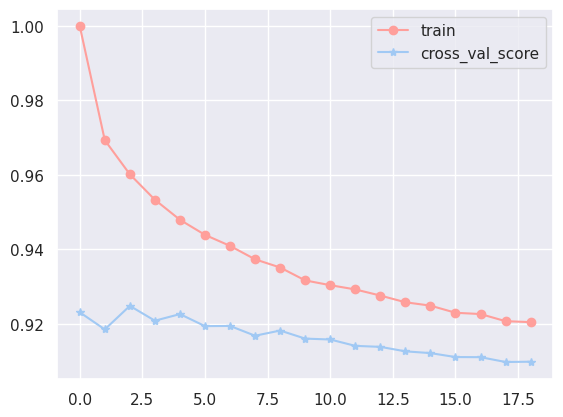

In [92]:
#find the best k value
import matplotlib.pyplot as plt
plt.plot(train_scores,'ro-',label='train')
plt.plot(cross_val_knn,'b*-',label='cross_val_score')
plt.legend()

In [93]:
#finding k value when k is 
#when k=3 we get best value for cv_score
#so we train the model using with k=3 value
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_Kn=knn.predict(X_test)
knn_final_cross_val_score=cross_val_score(knn,X_train,y_train,cv=15).mean()
print('cross val score',cross_val_score(knn,X_train,y_train,cv=15).mean())




cross val score 0.9263494769675213


In [94]:
from sklearn.tree import DecisionTreeClassifier
cross_val_tree=[]
train_tree=[]
test_score_tree=[]
max_depth=np.arange(1,20)
for d in max_depth:
  dt=DecisionTreeClassifier(max_depth=d,random_state=10,)
  dt.fit(X_train,y_train)
  print('depth_value is',d,'train_score_dt is',dt.score(X_train,y_train),'cross_val_score_dt is',cross_val_score(dt,X_train,y_train).mean())
  train_tree.append(dt.score(X_train,y_train))
  test_score_tree.append(dt.score(X_test,y_test))
  cross_val_tree.append(cross_val_score(dt,X_train,y_train).mean())




depth_value is 1 train_score_dt is 0.7240910097781715 cross_val_score_dt is 0.7240910003514783
depth_value is 2 train_score_dt is 0.7694218537388058 cross_val_score_dt is 0.7649448962538015
depth_value is 3 train_score_dt is 0.8227904180247461 cross_val_score_dt is 0.8232179333572993
depth_value is 4 train_score_dt is 0.8515711528116199 cross_val_score_dt is 0.8449423803296285
depth_value is 5 train_score_dt is 0.865083383437233 cross_val_score_dt is 0.8612867825610657
depth_value is 6 train_score_dt is 0.8762222714471061 cross_val_score_dt is 0.8641826275561039
depth_value is 7 train_score_dt is 0.8917122875858359 cross_val_score_dt is 0.8763026654276471
depth_value is 8 train_score_dt is 0.9050979399386095 cross_val_score_dt is 0.8857011267334844
depth_value is 9 train_score_dt is 0.9150026897882978 cross_val_score_dt is 0.8947197272988537
depth_value is 10 train_score_dt is 0.9268219360146831 cross_val_score_dt is 0.8987069439006488
depth_value is 11 train_score_dt is 0.937264643523

In [95]:
y_pred_dt=dt.predict(X_test)

In [96]:
dt.get_depth()

19

In [97]:
dt.tree_.node_count

8127

In [98]:
train_tree

[0.7240910097781715,
 0.7694218537388058,
 0.8227904180247461,
 0.8515711528116199,
 0.865083383437233,
 0.8762222714471061,
 0.8917122875858359,
 0.9050979399386095,
 0.9150026897882978,
 0.9268219360146831,
 0.9372646435239391,
 0.9483402423973925,
 0.9596373532483149,
 0.9693997025410588,
 0.9772317331730008,
 0.9837188696560235,
 0.9889244011265467,
 0.9925002373342616,
 0.995490649030094]

In [99]:
test_score_tree

[0.5672926447574335,
 0.6241895819360608,
 0.6322378716744914,
 0.7920858484238766,
 0.7643639615470601,
 0.7849318131008272,
 0.7981220657276995,
 0.8115358819584172,
 0.8152246814218645,
 0.8073999552872793,
 0.8138832997987927,
 0.8204784261122289,
 0.8127654817795663,
 0.8115358819584172,
 0.8117594455622624,
 0.8096355913257322,
 0.8089649005141963,
 0.8079588642968925,
 0.8075117370892019]

In [100]:
cross_val_tree

[0.7240910003514783,
 0.7649448962538015,
 0.8232179333572993,
 0.8449423803296285,
 0.8612867825610657,
 0.8641826275561039,
 0.8763026654276471,
 0.8857011267334844,
 0.8947197272988537,
 0.8987069439006488,
 0.9023302877716572,
 0.906333330913373,
 0.9083586035594443,
 0.9099883165988911,
 0.9110168314075457,
 0.9119978140248879,
 0.9117446669917758,
 0.911554812349608,
 0.9117604885248823]

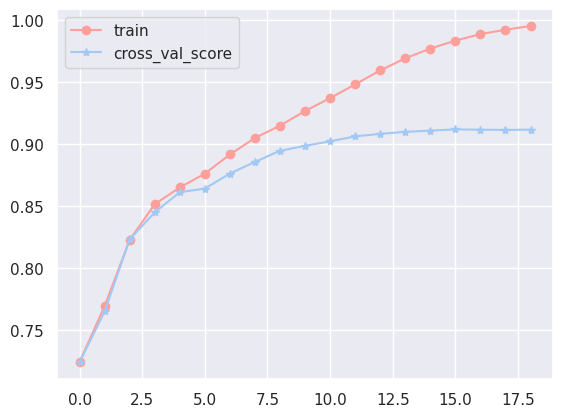

In [101]:
plt.plot(train_tree,'ro-',label='train')
plt.plot(cross_val_tree,'b*-',label='cross_val_score')
plt.legend()

In [102]:
#finding the best depth_value is 11 after 11 cross_val_score was increasing very slightly so we choose depth value as 11
dt=DecisionTreeClassifier(max_depth=11,random_state=10,)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
dt_final_cross_val_score=cross_val_score(dt,X_train,y_train).mean()
print('depth_value is',11,'train_score_dt is',dt.score(X_train,y_train),'cross_val_score_dt is',cross_val_score(dt,X_train,y_train).mean())


depth_value is 11 train_score_dt is 0.9372646435239391 cross_val_score_dt is 0.9023302877716572


In [103]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'dur <= -0.346\ngini = 0.5\nsamples = 63202\nvalue = [31601, 31601]'),
 Text(0.25, 0.7, 'prev_outcome_unknown <= 0.5\ngini = 0.397\nsamples = 31265\nvalue = [22714, 8551]'),
 Text(0.125, 0.5, 'prev_outcome_failure <= 0.5\ngini = 0.476\nsamples = 9411\nvalue = [3683, 5728]'),
 Text(0.0625, 0.3, 'prev_outcome_other <= 0.5\ngini = 0.293\nsamples = 6554\nvalue = [1169, 5385]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'mon <= 10.5\ngini = 0.211\nsamples = 2857\nvalue = [2514, 343]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'mon <= 4.5\ngini = 0.225\nsamples = 21854\nvalue = [19031, 2823]'),
 Text(0.3125, 0.3, 'mon <= 1.5\ngini = 0.497\nsamples = 1732\nvalue = [800, 932]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'mon <= 8.5\ngini = 0.17\nsamples = 20122\nvalue = [18231, 1891]'),
 Text(0.40625, 0.1, '\n  (...)  \n'

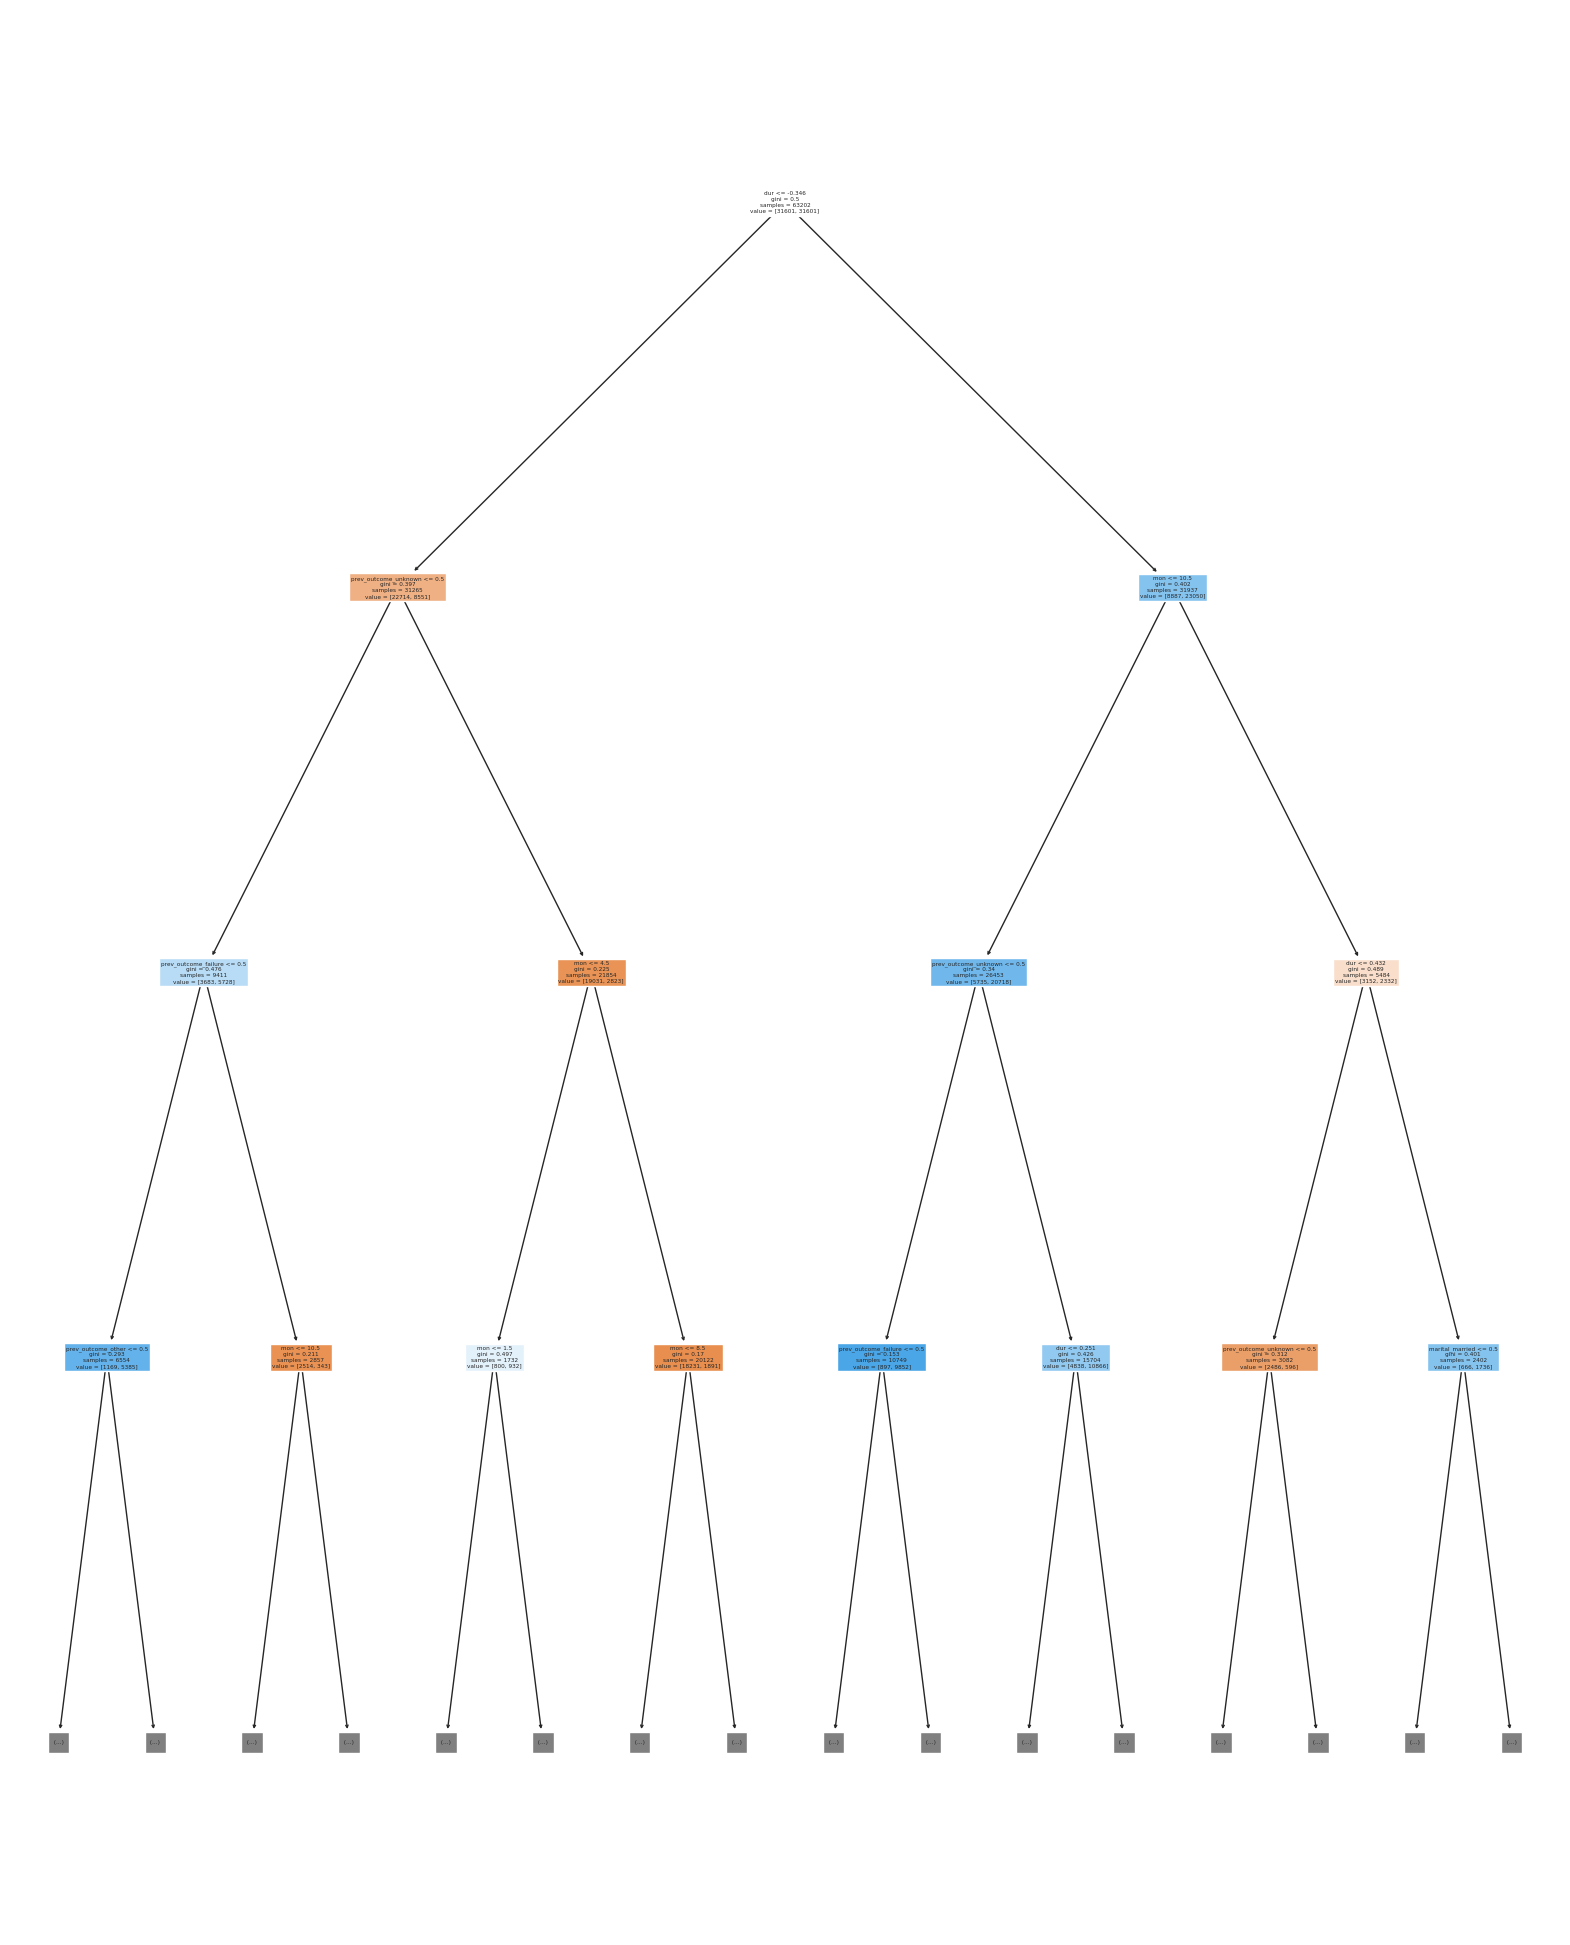

In [104]:
plt.figure(figsize=(20,25))
plot_tree(dt,max_depth=3,filled=True,feature_names=X_train.columns)


In [105]:
#Random forest Classifier
from  sklearn.ensemble import RandomForestClassifier

max_depth=np.arange(1,21)
rfc_train_score=[]
rfc_test_score=[]
rfc_cross_val_score=[]
for d in max_depth:
  rfc=RandomForestClassifier(max_depth=d,random_state=10)
  rfc.fit(X_train,y_train)
  print('depth_value is',d,'train_score',rfc.score(X_train,y_train),'cross_val_score_rfc is',cross_val_score(rfc,X_train,y_train).mean())
  rfc_train_score.append(rfc.score(X_train,y_train))
  rfc_test_score.append(rfc.score(X_test,y_test))
  rfc_cross_val_score.append(cross_val_score(rfc,X_train,y_train).mean())


depth_value is 1 train_score 0.8005601088573147 cross_val_score_rfc is 0.7972695451008823
depth_value is 2 train_score 0.8420303154963451 cross_val_score_rfc is 0.8375215230428612
depth_value is 3 train_score 0.8572988196576058 cross_val_score_rfc is 0.8518092173448062
depth_value is 4 train_score 0.8697034903958736 cross_val_score_rfc is 0.8656064516306694
depth_value is 5 train_score 0.8792443277111484 cross_val_score_rfc is 0.8727580975207256
depth_value is 6 train_score 0.890747128255435 cross_val_score_rfc is 0.8809699914083067
depth_value is 7 train_score 0.9022973956520364 cross_val_score_rfc is 0.8885330985471226
depth_value is 8 train_score 0.9114110312964779 cross_val_score_rfc is 0.89540005822925
depth_value is 9 train_score 0.9219012056580488 cross_val_score_rfc is 0.9002259287390139
depth_value is 10 train_score 0.930381949938293 cross_val_score_rfc is 0.905668880346151
depth_value is 11 train_score 0.9400493655264074 cross_val_score_rfc is 0.9100516853437528
depth_value i

In [106]:
y_pred_rfc=rfc.predict(X_test)

In [107]:
rfc_train_score

[0.8005601088573147,
 0.8420303154963451,
 0.8572988196576058,
 0.8697034903958736,
 0.8792443277111484,
 0.890747128255435,
 0.9022973956520364,
 0.9114110312964779,
 0.9219012056580488,
 0.930381949938293,
 0.9400493655264074,
 0.949653491978102,
 0.9586089047814943,
 0.9684820100629727,
 0.97623492927439,
 0.983623935951394,
 0.9891933799563305,
 0.9937185532103414,
 0.996218474098921,
 0.9980063922027784]

In [108]:
rfc_test_score

[0.6731500111781802,
 0.6983009166107758,
 0.7282584395260452,
 0.7626872345182204,
 0.7608987256874581,
 0.7829197406662195,
 0.8001341381623072,
 0.8059467918622848,
 0.8191370444891571,
 0.8246143527833669,
 0.8303152246814218,
 0.8383635144198525,
 0.8401520232506148,
 0.8419405320813772,
 0.8482003129890454,
 0.8520008942544154,
 0.8535658394813325,
 0.8587078023697742,
 0.8566957299351665,
 0.857813547954393]

In [109]:
rfc_cross_val_score

[0.7972695451008823,
 0.8375215230428612,
 0.8518092173448062,
 0.8656064516306694,
 0.8727580975207256,
 0.8809699914083067,
 0.8885330985471226,
 0.89540005822925,
 0.9002259287390139,
 0.905668880346151,
 0.9100516853437528,
 0.914592659359388,
 0.9171401302172256,
 0.9211590036539731,
 0.9247664684135108,
 0.9266493522684373,
 0.9280258844787757,
 0.9292283810766453,
 0.9299878659856065,
 0.9302410030050898]

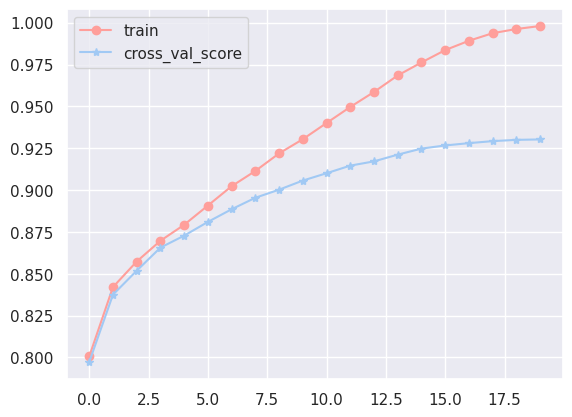

In [110]:
plt.plot(rfc_train_score,'ro-',label='train')
plt.plot(rfc_cross_val_score,'b*-',label='cross_val_score')
plt.legend()

In [111]:
#finding best depth value is 11 after 11 cross_val_score and training_score difference is high and cross_val_score incrase very small value 
# so we choose depth value as 11
rfc=RandomForestClassifier(max_depth=11,random_state=10)
rfc.fit(X_train,y_train)
rfc_final_cross_val_score=cross_val_score(rfc,X_train,y_train,cv=15)
print('depth_value is',d,'train_score',rfc.score(X_train,y_train),'cross_val_score_rfc is',cross_val_score(rfc,X_train,y_train).mean())
  

depth_value is 20 train_score 0.9400493655264074 cross_val_score_rfc is 0.9100516853437528


In [112]:
#gradient Boosting Technique

In [113]:
import xgboost as xgb
cross_value_xgb=[]
train_score_xgb=[]
test_score_xgb=[]
max_depth=np.arange(1,21)
for d in max_depth:
  xgb_classifier=xgb.XGBClassifier(learning_rate=(0.1),n_estimators=100,random_state=0,max_depth=d)
  xgb_classifier.fit(X_train,y_train)
  print('max_depth is',d,'train_score',xgb_classifier.score(X_train,y_train),'cross_val_score',cross_val_score(xgb_classifier,X_train,y_train).mean())
  train_score_xgb.append(xgb_classifier.score(X_train,y_train))
  test_score_xgb.append(xgb_classifier.score(X_test,y_test))
  cross_value_xgb.append(cross_val_score(xgb_classifier,X_train,y_train).mean())


max_depth is 1 train_score 0.8683427739628493 cross_val_score 0.8641190485250425
max_depth is 2 train_score 0.8981994240688586 cross_val_score 0.8887231221692724
max_depth is 3 train_score 0.913072371127496 cross_val_score 0.9004950875641748
max_depth is 4 train_score 0.9217588051011044 cross_val_score 0.9057481632501835
max_depth is 5 train_score 0.930160437960824 cross_val_score 0.9093240325082437
max_depth is 6 train_score 0.9370114869782602 cross_val_score 0.913406202091046
max_depth is 7 train_score 0.9475807727603557 cross_val_score 0.9166181523052874
max_depth is 8 train_score 0.957738679155723 cross_val_score 0.9196085547430052
max_depth is 9 train_score 0.9690041454384355 cross_val_score 0.9229470659567672
max_depth is 10 train_score 0.9765988418088035 cross_val_score 0.9253995362688621
max_depth is 11 train_score 0.9865668807949115 cross_val_score 0.9271874433604136
max_depth is 12 train_score 0.9911078763330274 cross_val_score 0.9283582956403664
max_depth is 13 train_score 0

In [114]:
train_score_xgb

[0.8683427739628493,
 0.8981994240688586,
 0.913072371127496,
 0.9217588051011044,
 0.930160437960824,
 0.9370114869782602,
 0.9475807727603557,
 0.957738679155723,
 0.9690041454384355,
 0.9765988418088035,
 0.9865668807949115,
 0.9911078763330274,
 0.9951109142115756,
 0.997863991645834,
 0.9988449732603398,
 0.9994303977722224,
 0.999541153760957,
 0.9996993766020063,
 0.9998101325907408,
 0.9998575994430556]

In [115]:
test_score_xgb

[0.7773306505700872,
 0.8104180639391907,
 0.8260675162083613,
 0.8350100603621731,
 0.8408227140621507,
 0.8440643863179075,
 0.8459646769505924,
 0.8475296221775095,
 0.8522244578582606,
 0.8528951486697965,
 0.8547954393024816,
 0.8565839481332439,
 0.8566957299351665,
 0.8575899843505478,
 0.8558014755197854,
 0.8564721663313213,
 0.8558014755197854,
 0.8549072211044042,
 0.8569192935390119,
 0.8585960205678516]

In [116]:
y_pred_xgb=xgb_classifier.predict(X_test)

In [117]:
cross_value_xgb

[0.8641190485250425,
 0.8887231221692724,
 0.9004950875641748,
 0.9057481632501835,
 0.9093240325082437,
 0.913406202091046,
 0.9166181523052874,
 0.9196085547430052,
 0.9229470659567672,
 0.9253995362688621,
 0.9271874433604136,
 0.9283582956403664,
 0.9288962528000608,
 0.9290070010283996,
 0.9291652363867223,
 0.9299563480897503,
 0.9297189988073769,
 0.930003826457809,
 0.9296715567387214,
 0.9300196379772873]

In [118]:
test_score_xgb

[0.7773306505700872,
 0.8104180639391907,
 0.8260675162083613,
 0.8350100603621731,
 0.8408227140621507,
 0.8440643863179075,
 0.8459646769505924,
 0.8475296221775095,
 0.8522244578582606,
 0.8528951486697965,
 0.8547954393024816,
 0.8565839481332439,
 0.8566957299351665,
 0.8575899843505478,
 0.8558014755197854,
 0.8564721663313213,
 0.8558014755197854,
 0.8549072211044042,
 0.8569192935390119,
 0.8585960205678516]

In [119]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_classifier=xgb.XGBClassifier(random_state=10)
xgb_classifier.fit(X_train,y_train)
print('cross_val_score is',cross_val_score(xgb_classifier,X_train,y_train).mean())
params={'n_estimators':[100],'learning_rate':[0.05,0.1,0.2,0.3,0.4,0.5],'max_depth':[1,2,3,4,5,6,7,8,9,10]}
gscv=GridSearchCV(xgb_classifier,params,cv=5)
gscv.fit(X_train,y_train)
print('train_score',gscv.score(X_train,y_train))
print('test_score',gscv.score(X_test,y_test))
print(gscv.best_params_)


cross_val_score is 0.9200833146412266
train_score 0.9993671086358027
test_score 0.8526715850659513
{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}


In [120]:
#fitting the best value for xgboost
xgb=xgb.XGBClassifier(learning_rate=(0.5),n_estimators=100,random_state=0,max_depth=10)
xgb.fit(X_train,y_train)
xgb_final_cross_val_score=cross_val_score(xgb,X_train,y_train,cv=15).mean()
print('max_depth is',10,'train_score',xgb.score(X_train,y_train),'cross_val_score',cross_val_score(xgb,X_train,y_train).mean())
  

max_depth is 10 train_score 0.9993671086358027 cross_val_score 0.9300355020683149


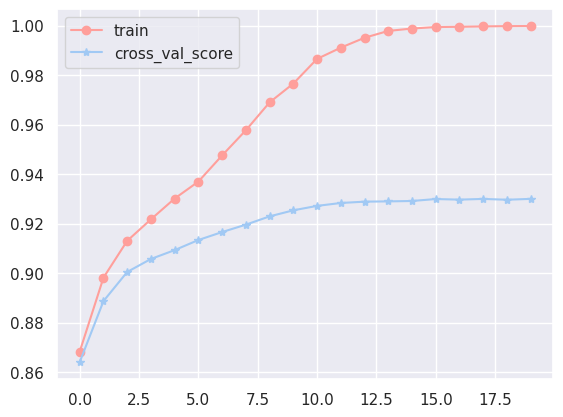

In [121]:
plt.plot(train_score_xgb,'ro-',label='train')
plt.plot(cross_value_xgb,'b*-',label='cross_val_score')
plt.legend()

In [126]:
#cross_validation_score
print('cross_validation_score of logistic regression:',cross_val_log_score.mean()) 
print('cross_validation_score of knn:',knn_final_cross_val_score) 
print('cross_validation_score of decision tree:',dt_final_cross_val_score) 
print('cross_validation_score of random forest:',rfc_final_cross_val_score.mean()) 
print('cross_validation_score of xgb:',xgb_final_cross_val_score) 

cross_validation_score of logistic regression: 0.8818267969536946
cross_validation_score of knn: 0.9263494769675213
cross_validation_score of decision tree: 0.9023302877716572
cross_validation_score of random forest: 0.9173315897603086
cross_validation_score of xgb: 0.9417613189270763


In [127]:
#accuracy,f1_score,Au-Roc
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
#confusion_matrix:
conf_log=confusion_matrix(y_test,y_pred_log)
conf_knn=confusion_matrix(y_test,y_pred_knn)
conf_dtc=confusion_matrix(y_test,y_pred_dt)
conf_rfc=confusion_matrix(y_test,y_pred_rfc)
conf_xgb=confusion_matrix(y_test,y_pred_xgb)

print('confusion_matrix for logistic regreesion is',conf_log)
print('confusion_matrix for KNeighbors is',conf_knn)
print('confusion_matrix for decisiontree is',conf_dtc)
print('confusion_matrix for random_forest is',conf_rfc)
print('confusion_matrix for xgb is',conf_xgb)


print('accuracy for logistic_regression is',accuracy_score(y_test,y_pred_log))
print('accuracy for KNeighbors is',accuracy_score(y_test,y_pred_knn))
print('accuracy for decision_tree is',accuracy_score(y_test,y_pred_dt))
print('accuracy for randomforest is',accuracy_score(y_test,y_pred_rfc))
print('accuracy for xgboost is',accuracy_score(y_test,y_pred_xgb))

print('AU-Roc for logistic_regression is',roc_auc_score(y_test,log_regression.predict_proba(X_test)[:,1]))
print('AU-Roc for KNeighbors is',roc_auc_score(y_test,knn.predict_proba(X_test)[:,1]))
print('AU-Roc for DecisionTree is',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1]))
print('AU-Roc for RandomForest is',roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1]))
print('AU-Roc for Xgboost is',roc_auc_score(y_test,xgb_classifier.predict_proba(X_test)[:,1]))




confusion_matrix for logistic regreesion is [[6757 1135]
 [ 304  750]]
confusion_matrix for KNeighbors is [[6739 1153]
 [ 237  817]]
confusion_matrix for decisiontree is [[6554 1338]
 [ 327  727]]
confusion_matrix for random_forest is [[6934  958]
 [ 314  740]]
confusion_matrix for xgb is [[6945  947]
 [ 318  736]]
accuracy for logistic_regression is 0.839145987033311
accuracy for KNeighbors is 0.8446232953275207
accuracy for decision_tree is 0.8138832997987927
accuracy for randomforest is 0.857813547954393
accuracy for xgboost is 0.8585960205678516
AU-Roc for logistic_regression is 0.8694155972805551
AU-Roc for KNeighbors is 0.8495138593017116
AU-Roc for DecisionTree is 0.8191775520763706
AU-Roc for RandomForest is 0.8931743143442161
AU-Roc for Xgboost is 0.9050673778168461


In [128]:
#based on Au-Roc score Xg boosting having good score


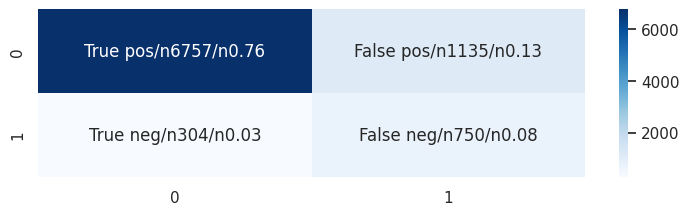

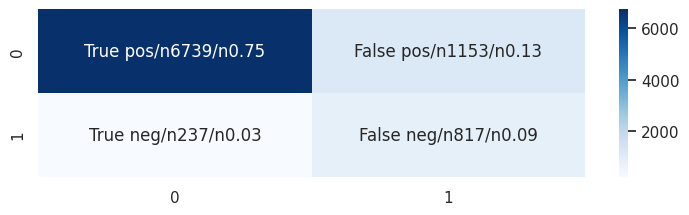

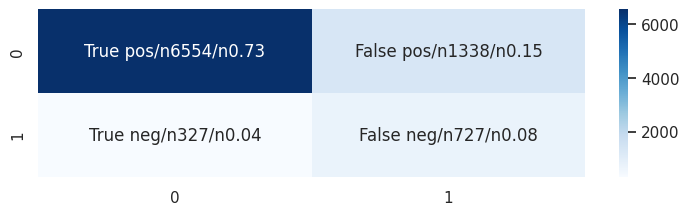

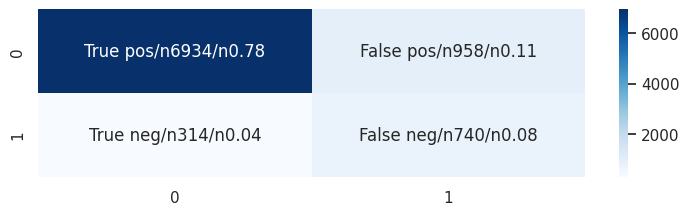

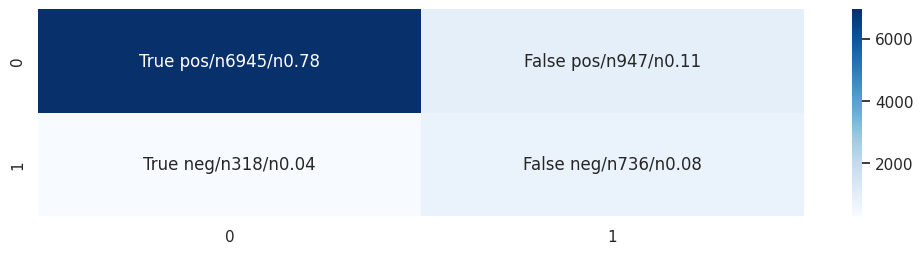

In [131]:
i=431
for cm in [conf_log,conf_knn,conf_dtc,conf_rfc,conf_xgb]:
  group_name=["True pos",'False pos','True neg','False neg']
  group_counts=["{0:0.0f}".format(value)for value in cm.flatten()]
  group_per=["{0:.2f}".format(i)for i in cm.flatten()/np.sum(cm)]
  labels=[f'{v1}/n{v2}/n{v3}'for v1,v2,v3 in zip (group_name,group_counts,group_per)]
  labels=np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(30,10))
  plt.subplot(i)
  sns.heatmap(cm,annot=labels,fmt="",cmap="Blues")
  i=i+1

plt.tight_layout()

In [139]:
print(dt.feature_importances_)

[0.04335384 0.01817093 0.01444599 0.00930107 0.03284168 0.11316512
 0.37797515 0.00888624 0.02520123 0.02364624 0.02205755 0.098199
 0.05813862 0.00535685 0.14926049]


In [133]:
importances=dt.feature_importances_

In [140]:
#feature_importance
df1=pd.DataFrame({'feature_names':X.columns,'importances':dt.feature_importances_})
df1

,feature_names,importances
0,age,0.043354
1,job,0.018171
2,education_qual,0.014446
3,call_type,0.009301
4,day,0.032842
5,mon,0.113165
6,dur,0.377975
7,num_calls,0.008886
8,marital_divorced,0.025201
9,marital_married,0.023646


In [138]:
df1.sort_values(by='importances',ascending=False)


,feature_names,importances
6,dur,0.377975
14,prev_outcome_unknown,0.149260
5,mon,0.113165
11,prev_outcome_failure,0.098199
12,prev_outcome_other,0.058139
0,age,0.043354
4,day,0.032842
8,marital_divorced,0.025201
9,marital_married,0.023646
10,marital_single,0.022058


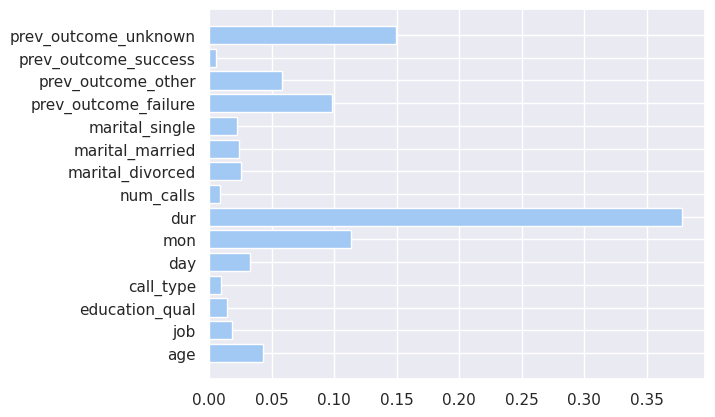

In [141]:
plt.barh(df1['feature_names'],df1['importances'],align='center')
plt.xticks()
plt.show()

In [136]:
importance=rfc.feature_importances_

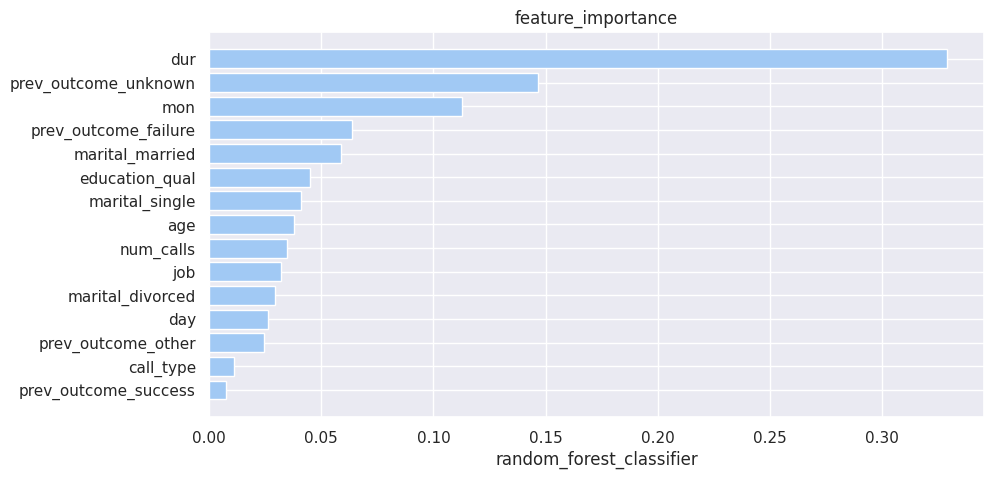

In [142]:
sorted_index=rfc.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X_train.columns[sorted_index],rfc.feature_importances_[sorted_index])
plt.title('feature_importance')
plt.xlabel('random_forest_classifier')
plt.show()